In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib import rcParams
pd.set_option('display.max_columns', None)


In [3]:
data = pd.read_csv('marketing_campaign_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [5]:
data

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# Tahap 1

## Numerik dan Kategorik


In [6]:
data_yes = data[data['Response'] == 1]
nums_list = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
cats_list = data.select_dtypes(include=['object']).columns.tolist()
cats_data = data.select_dtypes(include=['object'])
nums_data = data.select_dtypes(include=[np.number])
nums_half = ['Income', 'Recency', 
             'MntCoke','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
             'conversion_rate', 'age', 'num_children', 'total_spending','total_transactions', 'avg_spending_per_transaction',
             'customer_tenure_days', 'customer_tenure_months','customer_tenure_years']

## Feature Engineering

### Conversion Rate

In [7]:
data['conversion_rate'] = data['Response'] / data['NumWebVisitsMonth']

### Field Usia

In [8]:
current_year = datetime.now().year

In [9]:
data['age'] = current_year - data['Year_Birth']

### Jumlah Anak

In [10]:
data['num_children'] = data['Kidhome'] + data['Teenhome']

### Total Spending

In [11]:
data['total_spending'] = (data['MntCoke'] + data['MntFruits'] + 
                          data['MntMeatProducts'] + data['MntFishProducts'] + 
                          data['MntSweetProducts'] + data['MntGoldProds'])

### Total Transaksi

In [12]:
data['total_transactions'] = (data['NumDealsPurchases'] + data['NumWebPurchases'] + 
                              data['NumCatalogPurchases'] + data['NumStorePurchases'])

### Rata Rata Pengeluaran Per transaksi

In [13]:
data['avg_spending_per_transaction'] = data['total_spending'] / data['total_transactions']

### Lama Bergabung

In [14]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [15]:
data['customer_tenure_days'] = (datetime.now() - data['Dt_Customer']).dt.days

In [16]:
data['customer_tenure_months'] = (datetime.now() - data['Dt_Customer']).dt.days //30

In [17]:
data['customer_tenure_years'] = (datetime.now() - data['Dt_Customer']).dt.days //365

## Clustering

In [18]:
def age_mapping(age):
    if age < 9:
        return 'Anak Anak'
    elif 10 <= age < 18:
        return 'Remaja'
    elif 18 <= age < 40:
        return 'Dewasa'
    elif 40 <= age < 60:
        return 'Orang Tua'
    else:
        return 'Lansia'

data['age_group'] = data['age'].apply(age_mapping)

## Numerik dan Kategorik 2

In [28]:
data_yes = data[data['Response'] == 1]
nums_list = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
cats_list = data.select_dtypes(include=['object']).columns.tolist()
cats_data = data.select_dtypes(include=['object'])
nums_data = data.select_dtypes(include=[np.number])
nums_half = ['Income', 'Recency', 
             'MntCoke','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
             'conversion_rate', 'age', 'num_children', 'total_spending','total_transactions', 'avg_spending_per_transaction',
             'customer_tenure_days', 'customer_tenure_months','customer_tenure_years']

## EDA

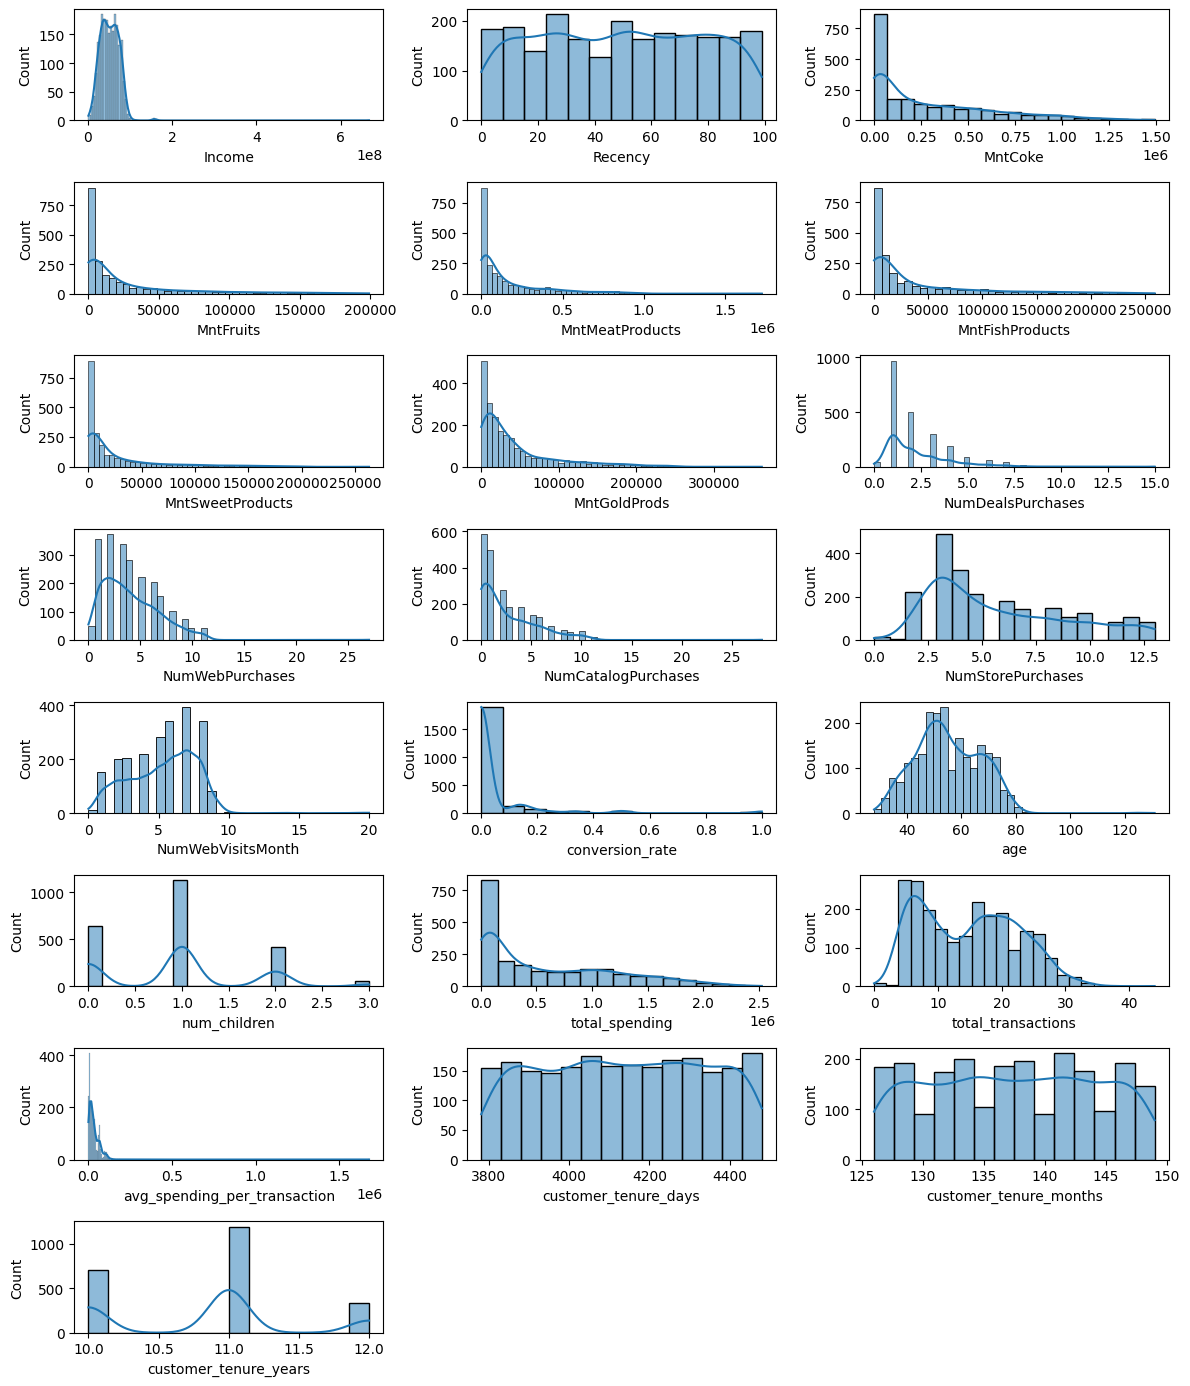

In [19]:
plt.figure(figsize=(12, 17))
num_columns = 3
for i in range(0, len(nums_half)):
    plt.subplot(10, num_columns, i+1)
    sns.histplot(data[nums_half[i]], kde=True)
    plt.tight_layout()
plt.show()

In [22]:
data_yes = data[data['Response'] == 1]

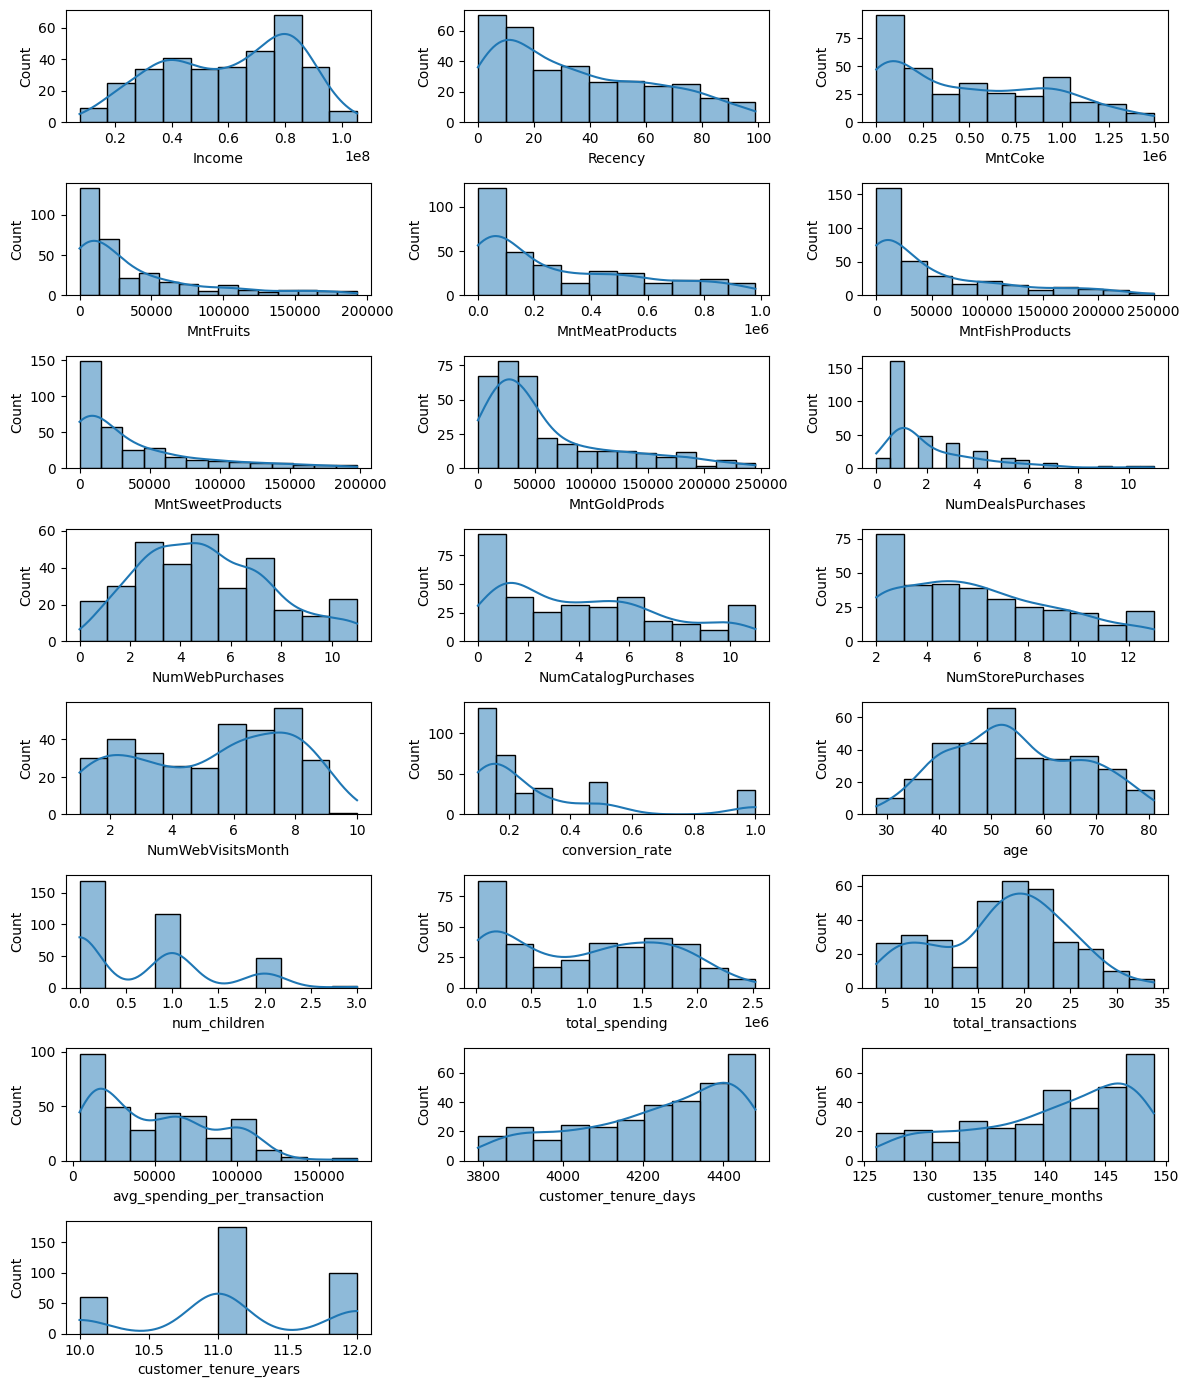

In [23]:
plt.figure(figsize=(12, 17))
num_columns = 3
for i in range(0, len(nums_half)):
    plt.subplot(10, num_columns, i+1)
    sns.histplot(data_yes[nums_half[i]], kde=True)
    plt.tight_layout()
plt.show()

### Insight EDA

Dari hasil analisis berdasarkan sebaran yang melakukan respon 1, terlihat bahwa data yang memiliki
penyebaran cukup tinggi pada grafik di atas adalah pelanggan potensial yang sudah pasti
melakukan pembelian dan memiliki konfersi tinggi

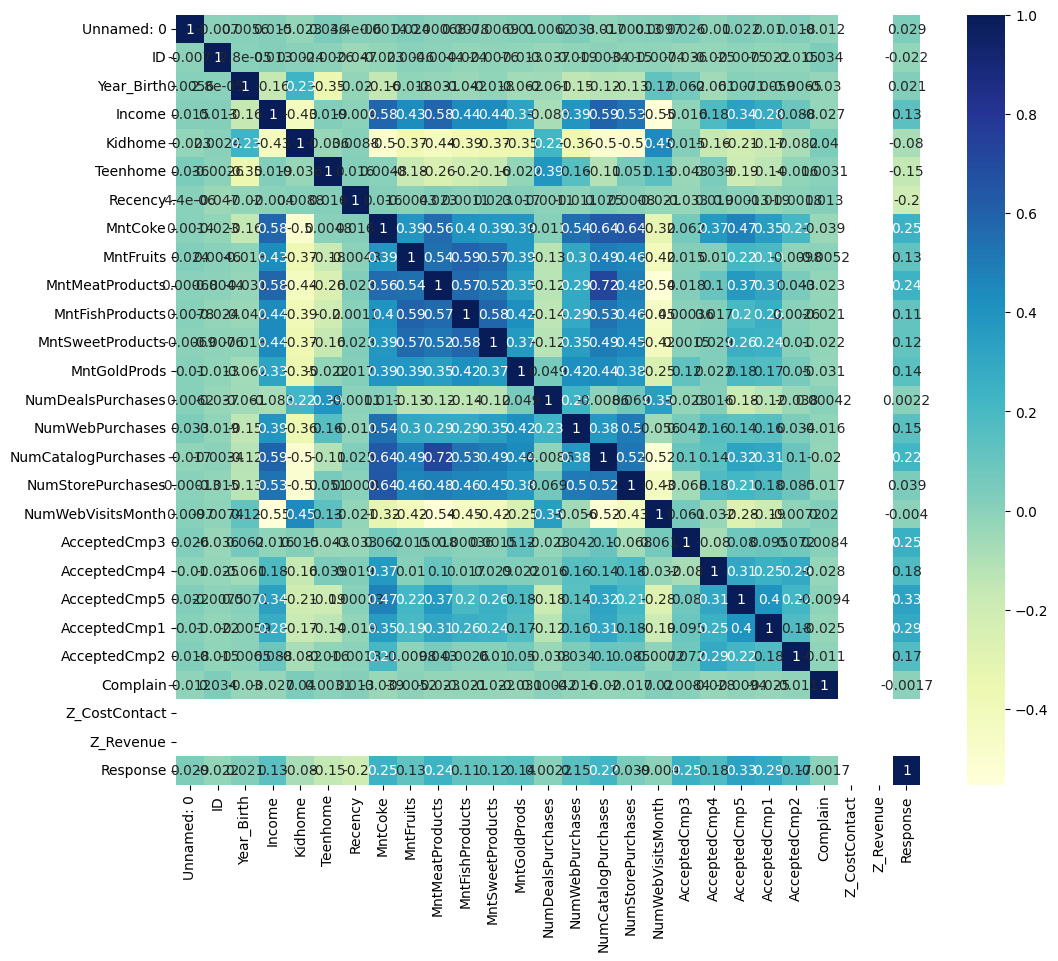

In [24]:
correlation_matrix = nums_data.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    2240 non-null   int64         
 1   ID                            2240 non-null   int64         
 2   Year_Birth                    2240 non-null   int64         
 3   Education                     2240 non-null   object        
 4   Marital_Status                2240 non-null   object        
 5   Income                        2216 non-null   float64       
 6   Kidhome                       2240 non-null   int64         
 7   Teenhome                      2240 non-null   int64         
 8   Dt_Customer                   2240 non-null   datetime64[ns]
 9   Recency                       2240 non-null   int64         
 10  MntCoke                       2240 non-null   int64         
 11  MntFruits                     